In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Inspect the first few lines of the file to understand its structure
print("First few lines of mymoviedb.csv:")
with open('mymoviedb.csv', 'r') as f:
    for i, line in enumerate(f):
        print(line.strip())
        if i >= 5: # Print first 6 lines
            break
print("\nAttempting to read CSV with error handling...")

df = pd.read_csv('mymoviedb.csv', on_bad_lines='skip', engine='python')
df

First few lines of mymoviedb.csv:
Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
2021-12-15,Spider-Man: No Way Home,"Peter Parker is unmasked and no longer able to separate his normal life from the high-stakes of being a super-hero. When he asks for help from Doctor Strange the stakes become even more dangerous, forcing him to discover what it truly means to be Spider-Man.",5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4irTY1GPXvft6k4YLjm.jpg
2022-03-01,The Batman,"In his second year of fighting crime, Batman uncovers corruption in Gotham City that connects to his own family while facing a serial killer known as the Riddler.",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R36Fpooo50r9T25onhq.jpg
2022-02-25,No Exit,"Stranded at a rest stop in the mountains during a blizzard, a recovering addict discovers a kidnapped child hidden in a car

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
...,...,...,...,...,...,...,...,...,...
9832,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...
9833,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...
9834,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...
9835,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...


# dataset info

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


exploring genre columns as they are separed from a commas

In [39]:
df['Genre']

,Genre
0,"Action, Adventure, Science Fiction"
1,"Crime, Mystery, Thriller"
2,Thriller
3,"Animation, Comedy, Family, Fantasy"
4,"Action, Adventure, Thriller, War"
...,...
9832,"Drama, Crime"
9833,Horror
9834,"Mystery, Thriller, Horror"
9835,"Music, Drama, History"


duplicated rows

In [40]:
df.duplicated().sum()

np.int64(0)

no duplicated rows in a dataset

want summary statistics of the dataset

In [41]:
df['Vote_Count'] = pd.to_numeric(df['Vote_Count'], errors='coerce')
df['Vote_Average'] = pd.to_numeric(df['Vote_Average'], errors='coerce')

print("Descriptive statistics after converting 'Vote_Count' and 'Vote_Average' to numeric:")
df[['Popularity','Vote_Count','Vote_Average']].describe()

Descriptive statistics after converting 'Vote_Count' and 'Vote_Average' to numeric:


,Popularity,Vote_Count,Vote_Average
count,9827.000000,9826.000000,9826.000000
mean,40.320570,1392.943721,6.439467
std,108.874308,2611.303856,1.129797
min,7.100000,0.000000,0.000000
25%,16.127500,146.000000,5.900000
50%,21.191000,444.000000,6.500000
75%,35.174500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


1. We have a total of 9827 rows and 9 columns in a dataframe.
2. our dataframe looks a bit neat with no nan's values.
3. Genre column has a comma separed values that needs to be handled.
4. their is no need of poster_url,overview,language columns during analysis.
5. release date column need to be casted into date time type and to extract the year only.

In [42]:
df['Release_Date']=pd.to_datetime(df['Release_Date'], errors='coerce')
df['Release_Date'].dtypes

dtype('<M8[ns]')

In [43]:
if 'Release_Date' in df.columns:
    df['Release_Year'] = df['Release_Date'].dt.year
    df = df.drop(columns=['Release_Date'])
    print("Successfully created 'Release_Year' and dropped 'Release_Date'.")
else:
    print("'Release_Date' column not found or already processed. Skipping year extraction and drop.")
df.head()

Successfully created 'Release_Year' and dropped 'Release_Date'.


,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Release_Year
0,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940.0,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021.0
1,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151.0,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...,2022.0
2,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122.0,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...,2022.0
3,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076.0,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...,2021.0
4,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793.0,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...,2021.0


dropping columns overview,original language,poster url

In [44]:
columns_to_drop = ['Poster_Url','Overview','Original_Language']
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

if existing_columns_to_drop:
    df.drop(columns=existing_columns_to_drop, inplace=True)
    print(f"Successfully dropped columns: {existing_columns_to_drop}")
else:
    print("None of the specified columns ('Poster_Url','Overview','Original_Language') were found to be dropped.")
df.head()

Successfully dropped columns: ['Poster_Url', 'Overview', 'Original_Language']


,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,Spider-Man: No Way Home,5083.954,8940.0,8.3,"Action, Adventure, Science Fiction",2021.0
1,The Batman,3827.658,1151.0,8.1,"Crime, Mystery, Thriller",2022.0
2,No Exit,2618.087,122.0,6.3,Thriller,2022.0
3,Encanto,2402.201,5076.0,7.7,"Animation, Comedy, Family, Fantasy",2021.0
4,The King's Man,1895.511,1793.0,7.0,"Action, Adventure, Thriller, War",2021.0


we would cut the vote_average values and make 4 categories popular,average,below_average,not popular to describe it using the categorize_col() function

In [45]:
# user defined function
def categorize_col(df,col,labels):
    edges=[df[col].describe()['min'],
          df[col].describe()['25%'],
          df[col].describe()['50%'],
          df[col].describe()['75%'],
          df[col].describe()['max']]
    df[col]=pd.cut(df[col],edges,labels=labels,duplicates='drop')
    return df

labels=['not popular','below_avg','average','popular']
df=categorize_col(df,'Vote_Average',labels)
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not popular', NaN]
Categories (4, object): ['not popular' < 'below_avg' < 'average' < 'popular']

In [46]:
df.head()

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,Spider-Man: No Way Home,5083.954,8940.0,popular,"Action, Adventure, Science Fiction",2021.0
1,The Batman,3827.658,1151.0,popular,"Crime, Mystery, Thriller",2022.0
2,No Exit,2618.087,122.0,below_avg,Thriller,2022.0
3,Encanto,2402.201,5076.0,popular,"Animation, Comedy, Family, Fantasy",2021.0
4,The King's Man,1895.511,1793.0,average,"Action, Adventure, Thriller, War",2021.0


exploring the vote_ average column

In [47]:
df['Vote_Average'].value_counts()

,count
Vote_Average,
not popular,2467
popular,2450
average,2411
below_avg,2398


dropping the nan values

In [48]:
df.dropna(inplace=True)
df.info()
df.isna().sum()   # confirming the nan

<class 'pandas.core.frame.DataFrame'>
Index: 9726 entries, 0 to 9836
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Title         9726 non-null   object  
 1   Popularity    9726 non-null   float64 
 2   Vote_Count    9726 non-null   float64 
 3   Vote_Average  9726 non-null   category
 4   Genre         9726 non-null   object  
 5   Release_Year  9726 non-null   float64 
dtypes: category(1), float64(3), object(2)
memory usage: 465.6+ KB


,0
Title,0
Popularity,0
Vote_Count,0
Vote_Average,0
Genre,0
Release_Year,0


we wolud like to split the genres columns so that their is only one genre per movie in each row

In [53]:

df['Genre']=df['Genre'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Title         25551 non-null  object  
 1   Popularity    25551 non-null  float64 
 2   Vote_Count    25551 non-null  float64 
 3   Vote_Average  25551 non-null  category
 4   Genre         25551 non-null  category
 5   Release_Year  25551 non-null  float64 
dtypes: category(2), float64(3), object(1)
memory usage: 849.4+ KB


In [55]:
df['Genre']=df['Genre'].str.split(', ')
df=df.explode('Genre').reset_index(drop=True)
df.head()

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,Spider-Man: No Way Home,5083.954,8940.0,popular,Action,2021.0
1,Spider-Man: No Way Home,5083.954,8940.0,popular,Adventure,2021.0
2,Spider-Man: No Way Home,5083.954,8940.0,popular,Science Fiction,2021.0
3,The Batman,3827.658,1151.0,popular,Crime,2022.0
4,The Batman,3827.658,1151.0,popular,Mystery,2022.0


In [58]:
df.nunique()

,0
Title,9414
Popularity,8087
Vote_Count,3265
Vote_Average,4
Genre,19
Release_Year,100


Data Visualisation

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

What is the most frewuent genre in the dataset ?

In [60]:
df['Genre'].describe()

,Genre
count,25551
unique,19
top,Drama
freq,3715


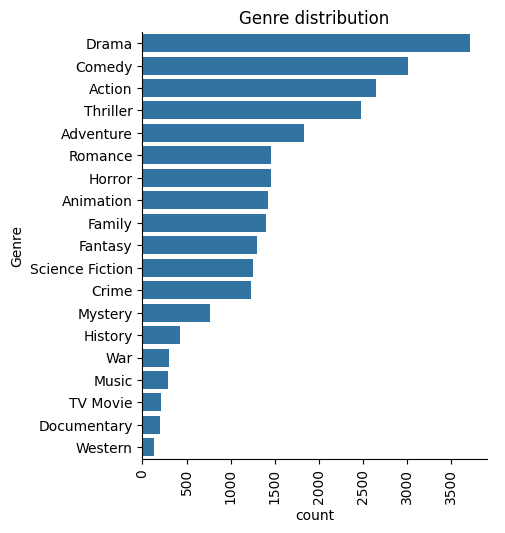

In [66]:
sns.catplot(data=df,y='Genre',kind='count',order=df['Genre'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Genre distribution")
plt.show()

which genre has the highest vote in vote averege column.

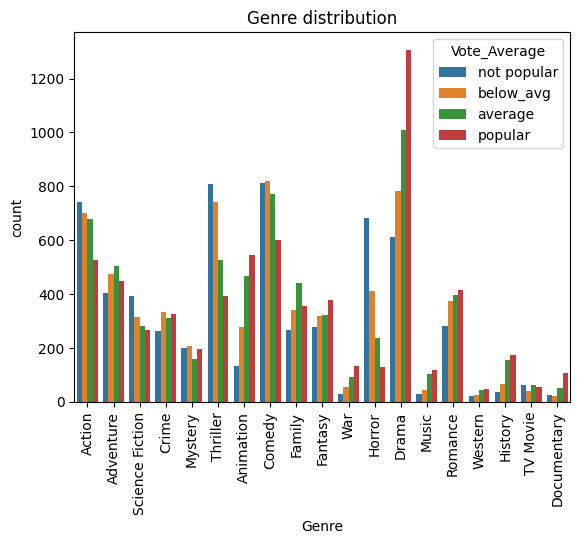

In [70]:
sns.countplot(data=df,x='Genre',hue='Vote_Average')
plt.xticks(rotation=90)
plt.title("Genre distribution")
plt.show()

which movie got the highest popularity and what it's genre ?

In [77]:
df[df['Popularity']== df['Popularity'].max()]
df

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,Spider-Man: No Way Home,5083.954,8940.0,popular,Action,2021.0
1,Spider-Man: No Way Home,5083.954,8940.0,popular,Adventure,2021.0
2,Spider-Man: No Way Home,5083.954,8940.0,popular,Science Fiction,2021.0
3,The Batman,5083.954,1151.0,popular,Crime,2022.0
4,The Batman,5083.954,1151.0,popular,Mystery,2022.0
...,...,...,...,...,...,...
25546,The United States vs. Billie Holiday,5083.954,152.0,average,Drama,2021.0
25547,The United States vs. Billie Holiday,5083.954,152.0,average,History,2021.0
25548,Threads,5083.954,186.0,popular,War,1984.0
25549,Threads,5083.954,186.0,popular,Drama,1984.0


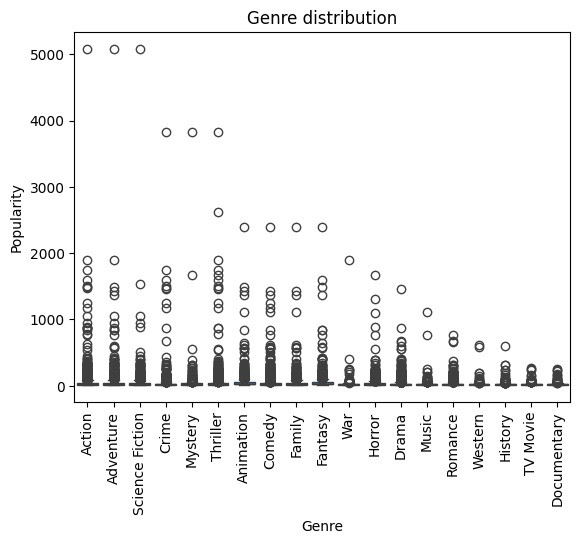

In [72]:
sns.boxplot(data=df,x='Genre',y='Popularity')
plt.xticks(rotation=90)
plt.title("Genre distribution")
plt.show()

which year has the most filmed movie ?

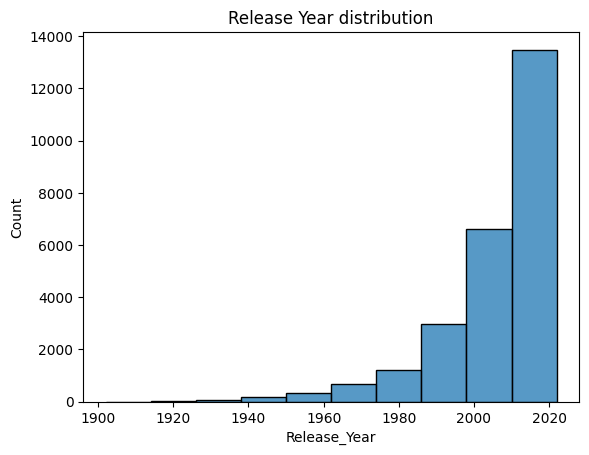

In [80]:
sns.histplot(data=df,x='Release_Year',bins=10)
plt.title("Release Year distribution")
plt.show()